In [40]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [50]:
np.random.seed(0)
df=pd.read_csv(r'C:\Users\kedia\Documents\Quantitative Trading\RELIANCE-EQ-1M.csv',parse_dates=True)
df.columns=["Date","O","H","L","C"]
df=df.iloc[::-1]
df.reset_index(inplace=True)
df.set_index("Date",inplace=True)
df.drop(columns="index",inplace=True)
# df=df[:375]
df=df["C"]
df=df.reset_index()["C"]

In [51]:
# np.random.seed(0)
# df=pd.read_csv(r'C:\Users\kedia\Documents\Quantitative Trading\SBIN-EQ - 1D.csv',parse_dates=True)
# df.columns=["Date","O","H","L","C"]
# df=df.iloc[::-1]
# df.reset_index(inplace=True)
# df.set_index("Date",inplace=True)
# df.drop(columns="index",inplace=True)
# # df=df[:375]
# df=df["C"]
# df=df.reset_index()["C"]

In [52]:
val=df.shift(-1)/df
val=val[:-1]
u=np.log(val)
n=len(u)
ans= np.sqrt((u**2).sum()/(n-1)-(u.sum())**2/(n*(n-1)))
print("Historical Volatility in 1 min timeframe is " +str(round(100*ans,3)) + "%")
print("error in the estimate is " + str(round(100*ans/np.sqrt(2*n),3)) + "%")

Historical Volatility in 1 min timeframe is 0.102%
error in the estimate is 0.001%


In [53]:
vol = []
t=5
for i in range(3,len(df)-t-1):
    val=df.shift(-1)[i-3:i+t]/df[i-3:i+t]
    val=val[:-1]
    u=np.log(val)
    n=len(u)
    ans= 100*np.sqrt((u**2).sum()/(n-1)-(u.sum())**2/(n*(n-1)))
    vol.append(ans)

(array([4.063e+03, 7.152e+03, 2.714e+03, 9.680e+02, 4.090e+02, 2.060e+02,
        1.370e+02, 4.600e+01, 1.500e+01, 1.100e+01, 1.200e+01, 8.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 7.000e+00, 8.000e+00, 7.000e+00,
        5.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00201121, 0.04311535, 0.08421948, 0.12532362, 0.16642776,
        0.20753189, 0.24863603, 0.28974017, 0.3308443 , 0.37194844,
        0.41305258, 0.45415671, 0.49526085, 0.53636499, 0.57746912,
        0.61857326, 0.6596774 , 0.70078153, 0.74188567, 0.78298981,
        0.82409394, 0.86519808, 0.90630222, 0.94740635, 0.98851049,
        1.02961463, 1.07071876, 1.1118229 , 1.15292704, 1.19403117,
        1.23513531]),
 <a list of 30 Patch objects>)

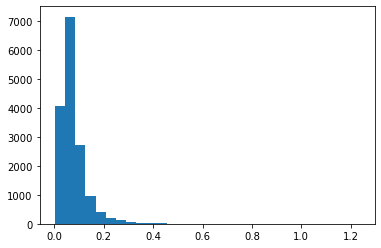

In [54]:
plt.hist(vol,bins=30)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        7.000e+00, 2.300e+01, 7.200e+01, 1.490e+02, 3.150e+02, 5.590e+02,
        9.600e+02, 1.443e+03, 1.957e+03, 2.401e+03, 2.362e+03, 1.905e+03,
        1.468e+03, 9.370e+02, 5.020e+02, 3.320e+02, 2.120e+02, 9.600e+01,
        2.300e+01, 1.800e+01, 1.300e+01, 2.100e+01, 1.100e+01, 1.100e+01]),
 array([-6.20901924e+00, -5.99501258e+00, -5.78100592e+00, -5.56699926e+00,
        -5.35299261e+00, -5.13898595e+00, -4.92497929e+00, -4.71097263e+00,
        -4.49696597e+00, -4.28295931e+00, -4.06895265e+00, -3.85494599e+00,
        -3.64093933e+00, -3.42693268e+00, -3.21292602e+00, -2.99891936e+00,
        -2.78491270e+00, -2.57090604e+00, -2.35689938e+00, -2.14289272e+00,
        -1.92888606e+00, -1.71487940e+00, -1.50087274e+00, -1.28686609e+00,
        -1.07285943e+00, -8.58852768e-01, -6.44846109e-01, -4.30839450e-01,
        -2.16832791e-01, -2.82613206e-03,  2.11180527e-01]),
 <a list of 30 Patch objects>)

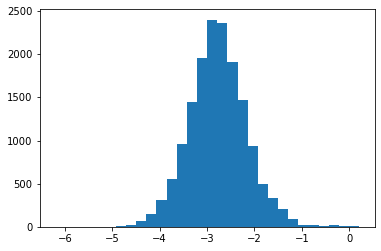

In [81]:
log_vol=np.log(vol)
plt.hist(log_vol,bins=30)

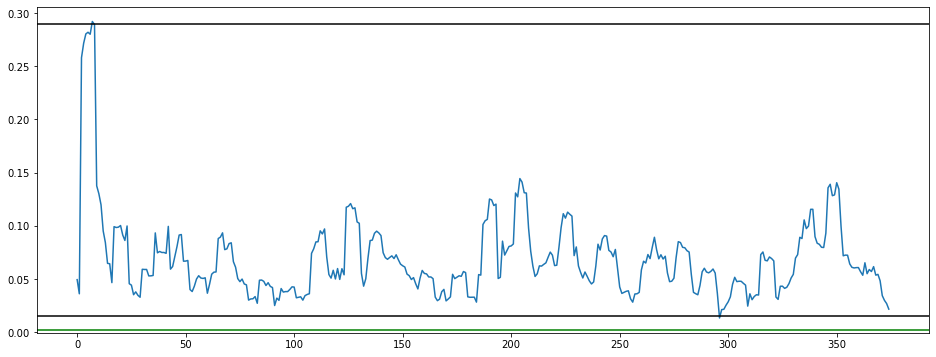

In [98]:
plt.figure(figsize=(16,6))
plt.plot(list(range(len(vol[-375:]))),vol[-375:])
plt.axhline(min(vol), color='green')
plt.axhline(np.exp(np.mean(log_vol)-2.3*np.std(log_vol)),color="k")
plt.axhline(np.exp(np.mean(log_vol)+2.5*np.std(log_vol)),color="k")

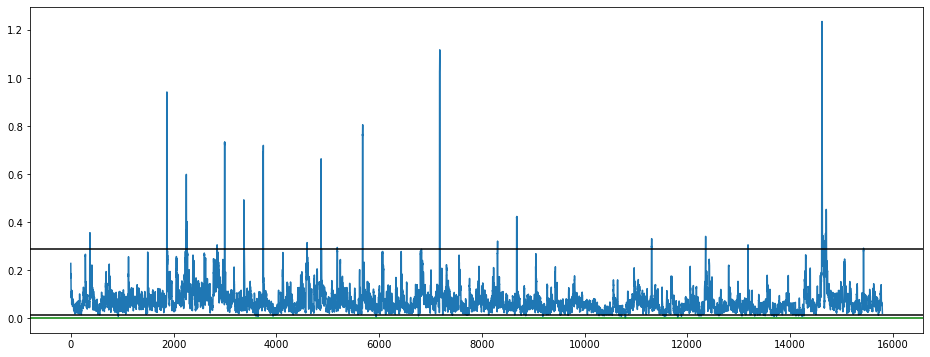

In [97]:
plt.figure(figsize=(16,6))
plt.plot(list(range(len(vol))),vol)

plt.axhline(np.exp(np.mean(log_vol)-2.3*np.std(log_vol)),color="k")
plt.axhline(np.exp(np.mean(log_vol)+2.5*np.std(log_vol)),color="k")
plt.axhline(min(vol),color="green")

In [110]:
np.exp(np.mean(log_vol)-2.3*np.std(log_vol))

0.0152799963050665

In [108]:
max(vol)

1.2351353100676778